# Natural Disasters Analysis - World Risk Index

#### Authors: Women of the West Coast (WWC)

#### Date: Oct. 22, 2023


## Table of Contents

1. Introduction
2. Data Processing and Cleaning
3. Global Analysis
4. North American Analysis
5. Canada-Specific Analysis
6. Insights and Conclusion


## Introduction

The World Risk Index provides insights into the risk that countries face from natural disasters and the vulnerabilities associated with them. 
Understanding these risks is crucial for governments, organizations, and communities to prepare, mitigate, and respond effectively to such events. 
This report presents an analysis of the World Risk Index, focusing on global trends, North American data, and specifically on Canada.



## Data Processing 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load the dataset
world_risk_index = pd.read_csv('world_risk_index.csv')

# Display the first few rows of the dataset
world_risk_index.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


The dataset provides information on the World Risk Index (WRI) for different regions. Here are the columns and their descriptions:

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Region</td>
      <td>The region or country being assessed.</td>
    </tr>
    <tr>
      <td>WRI</td>
      <td>World Risk Index score.</td>
    </tr>
    <tr>
      <td>Exposure</td>
      <td>Exposure to natural disasters.</td>
    </tr>
    <tr>
      <td>Vulnerability</td>
      <td>Overall vulnerability to natural disasters.</td>
    </tr>
    <tr>
      <td>Susceptibility</td>
      <td>Susceptibility to natural disasters.</td>
    </tr>
    <tr>
      <td>Lack of Coping Capabilities</td>
      <td>The region's inability to cope with the effects of a disaster.</td>
    </tr>
    <tr>
      <td>Lack of Adaptive Capacities</td>
      <td>The region's inability to adapt to potential future disasters.</td>
    </tr>
    <tr>
      <td>Year</td>
      <td>The year of the assessment.</td>
    </tr>
    <tr>
      <td>Exposure Category</td>
      <td>Categorical representation of exposure (e.g., "Very High").</td>
    </tr>
    <tr>
      <td>WRI Category</td>
      <td>Categorical representation of the World Risk Index score.</td>
    </tr>
    <tr>
      <td>Vulnerability Category</td>
      <td>Categorical representation of vulnerability.</td>
    </tr>
    <tr>
      <td>Susceptibility Category</td>
      <td>Categorical representation of susceptibility.</td>
    </tr>
  </tbody>
</table>

## Data Cleaning

Before diving into the analysis, it's essential to ensure the quality and reliability of the dataset. 
This section details the steps taken to clean the World Risk Index dataset. We will:

1. Check for missing values.
2. Handle any duplicate entries.

Once the data is clean, we'll proceed with the analysis, focusing on global data, then narrowing it down to North American data, and finally concentrating on Canada-specific data.

#### Step 1: Checking for Missing Values

In [3]:
# Check for missing values in the dataset
missing_values = world_risk_index.isnull().sum()

missing_values

Region                          0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
Year                            0
Exposure Category               0
WRI Category                    1
Vulnerability Category          4
Susceptibility Category         0
dtype: int64

The dataset has a few missing values:

- 1 missing value in "Lack of Adaptive Capacities".
- 1 missing value in "WRI Category".
- 4 missing values in "Vulnerability Category".

Given the dataset and the nature of the missing values, it might be best to drop the rows with missing values to ensure the integrity of our analysis. This approach is reasonable if the number of missing values is relatively small compared to the dataset's size.

Let's proceed to drop rows with missing values.

In [4]:
# Drop rows with missing values
world_risk_index_cleaned = world_risk_index.dropna()

# Check the shape of the cleaned dataset
cleaned_data_shape = world_risk_index_cleaned.shape

cleaned_data_shape

(1912, 12)

The cleaned dataset contains 1,912 rows and 12 columns.

#### Step 2: Handling Duplicate Entries

Let's check the dataset for any duplicate entries.

In [5]:
# Check for duplicate rows in the dataset
duplicate_rows = world_risk_index.duplicated().sum()

duplicate_rows

0

There are no duplicate entries in the dataset. Now, with the data cleaned, let's begin the analysis.


## Global Analysis

This section provides a global perspective on the World Risk Index and its associated metrics.

We'll start by examining the global trends of the World Risk Index (WRI) over time and then explore the distribution of regions based on their WRI categories for the most recent year in the dataset.

### Trend of World Risk Index Over Time

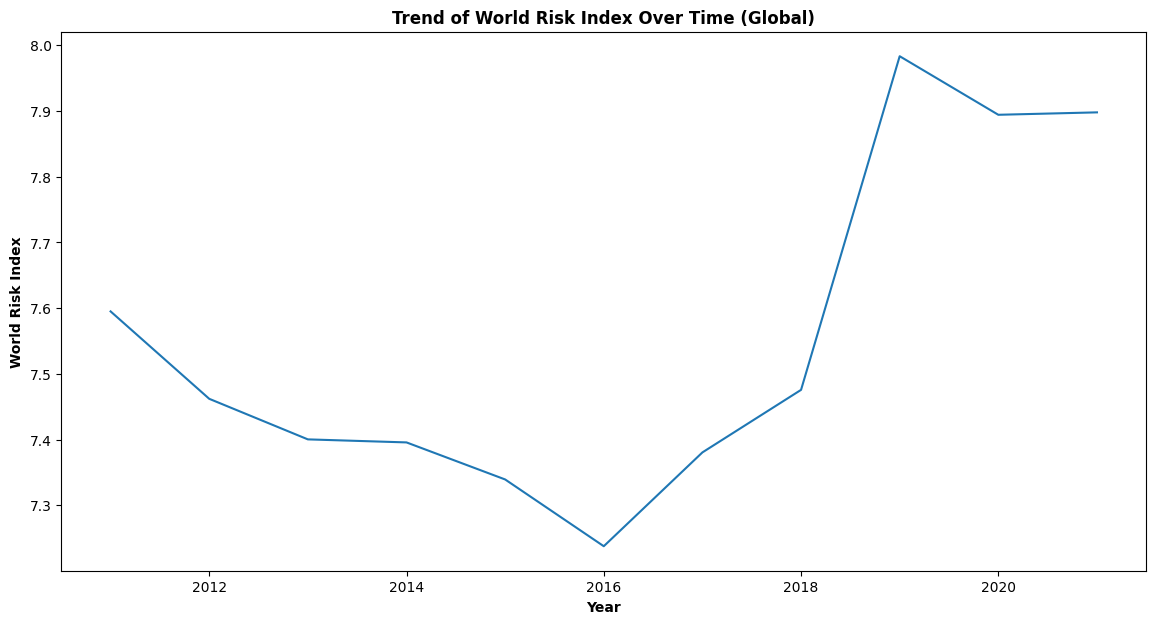

In [6]:
# Plotting the trend of World Risk Index over the years (Global)
plt.figure(figsize=(14, 7))
sns.lineplot(data=world_risk_index_cleaned, x="Year", y="WRI", ci=None)
plt.title("Trend of World Risk Index Over Time (Global)", fontweight='bold')
plt.ylabel("World Risk Index", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.show()

The global trend of the World Risk Index (WRI) over time exhibits a general decline up until 2016. This suggests that, on a global scale, regions have been improving their ability to manage, adapt to, or reduce susceptibility to natural disasters. However, the increase in the World Risk Index after 2016, peaking in 2019, indicates a reversal of this trend. Such a rise could be due to a surge in the number or severity of natural disasters during this period or perhaps a decrease in global preparedness or the ability to respond to these events effectively. This rise might also reflect socio-political factors and economic challenges.

Next, let's identify the most vulnerable regions. We'll focus on the most recent year available in the dataset and display the top regions with the highest vulnerability scores.

### Top Regions with the Highest Vulnerability Scores

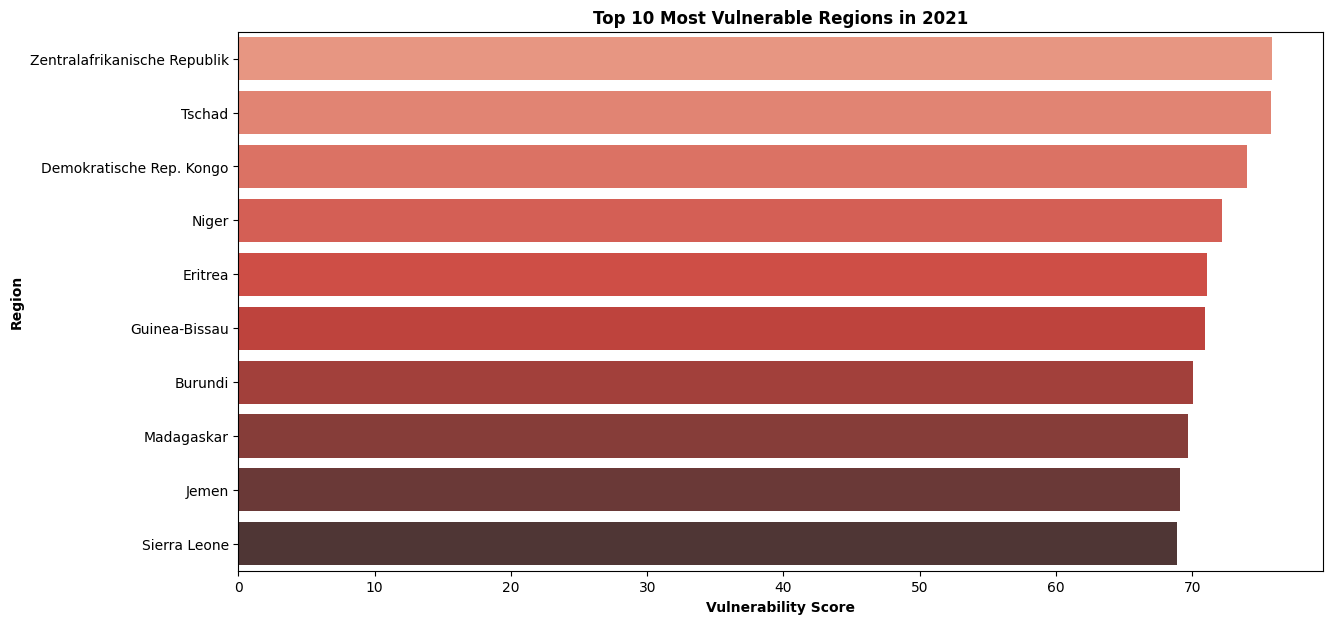

In [7]:
# Determine the most recent year in the dataset
latest_year = world_risk_index_cleaned["Year"].max()

#Filtering data for the most recent year
latest_year_data_global = world_risk_index_cleaned[world_risk_index_cleaned["Year"] == latest_year]

# Sorting by Vulnerability and selecting the top 10 regions
top_vulnerable_regions = latest_year_data_global.sort_values(by="Vulnerability", ascending=False).head(10)

# Plotting the top 10 vulnerable regions
plt.figure(figsize=(14, 7))
sns.barplot(x="Vulnerability", y="Region", data=top_vulnerable_regions, palette="Reds_d")
plt.title(f"Top 10 Most Vulnerable Regions in {latest_year}", fontweight='bold')
plt.xlabel("Vulnerability Score", fontweight='bold')
plt.ylabel("Region", fontweight='bold')
plt.show()

The bar chart showcases the top 10 regions with the highest vulnerability scores in the most recent year from the dataset. These regions are more susceptible to the adverse impacts of natural disasters, making them critical areas of focus for interventions, support, and resource allocation.

Next, let's explore the relationship between a region's exposure to natural disasters and its lack of coping capabilities. This will help us understand whether regions with higher exposure also tend to have a reduced ability to cope with disasters. We will use a scatter plot to visualize this relationship.

### Natural Disasters vs. Lack of Coping Capabilities

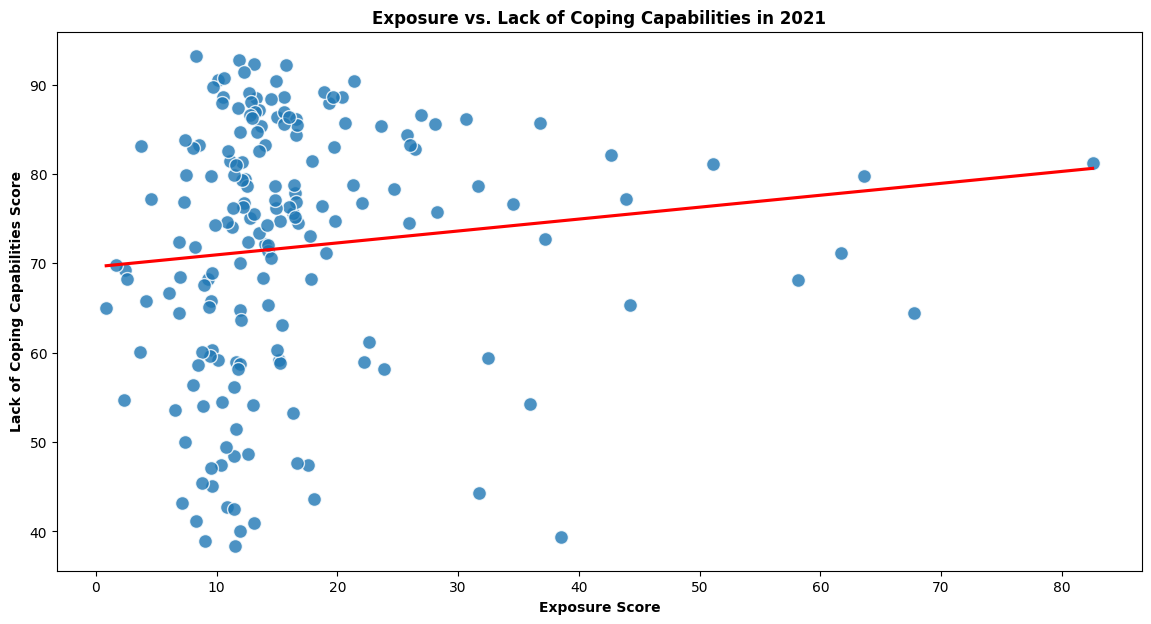

In [8]:
# Plotting the relationship between Exposure and Lack of Coping Capabilities with a trend line
plt.figure(figsize=(14, 7))
sns.regplot(x="Exposure", y="Lack of Coping Capabilities", data=latest_year_data_global, scatter_kws={'s':100, 'edgecolor':'w'}, line_kws={'color':'red'}, ci=None)
plt.title(f"Exposure vs. Lack of Coping Capabilities in {latest_year}", fontweight='bold')
plt.xlabel("Exposure Score", fontweight='bold')
plt.ylabel("Lack of Coping Capabilities Score", fontweight='bold')
plt.show()

The scatter plot illustrates the relationship between a region's exposure to natural disasters and its lack of coping capabilities. Each point on the graph represents a region, and the position of the point indicates its scores for exposure and lack of coping capabilities.

From the plot, we can observe that regions with higher exposure scores tend to also have higher scores for lack of coping capabilities. This suggests that there's a positive correlation between exposure to natural disasters and the inability to cope with their effects.

Lastly, let's visualize the distribution of regions based on their World Risk Index (WRI) categories. This will give us an idea of how many regions fall into each risk category.

### Distribution of Regions by WRI Category (Global - Latest Year)

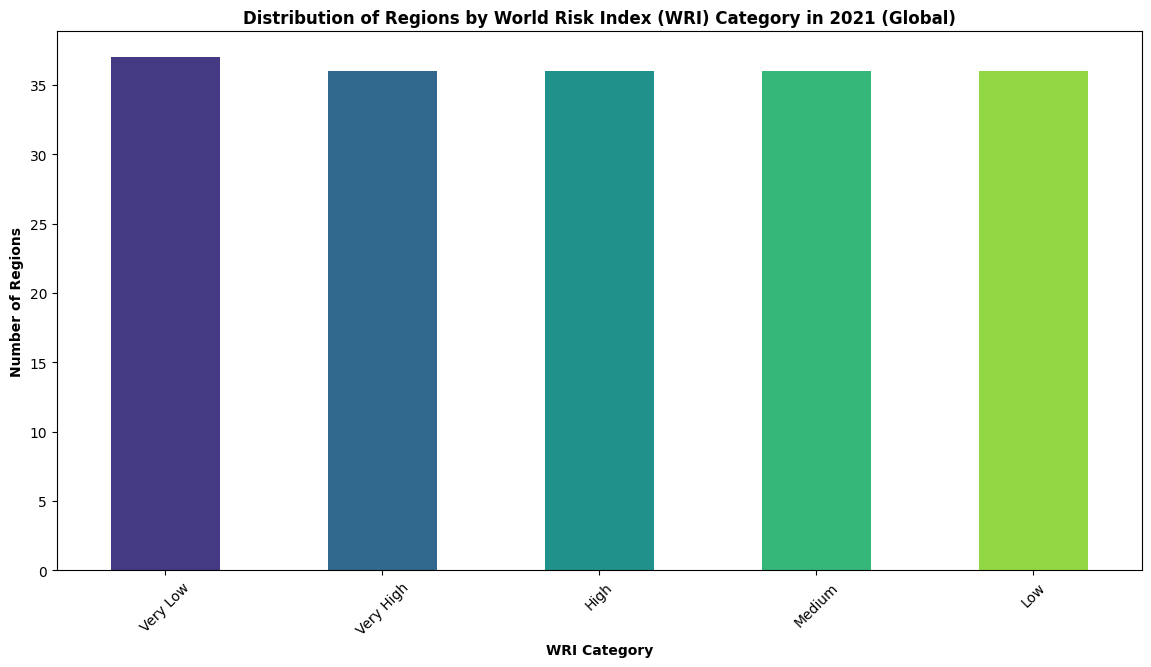

In [9]:
# Counting the number of regions in each WRI category
wri_category_counts_global = latest_year_data_global["WRI Category"].value_counts()

# Plotting the distribution of WRI categories (Global)
plt.figure(figsize=(14, 7))
wri_category_counts_global.plot(kind="bar", color=sns.color_palette("viridis", len(wri_category_counts_global)))
plt.title(f"Distribution of Regions by World Risk Index (WRI) Category in {latest_year} (Global)", fontweight='bold')
plt.xlabel("WRI Category", fontweight='bold')
plt.ylabel("Number of Regions", fontweight='bold')
plt.xticks(rotation=45)
plt.show()

The bar chart displays the distribution of regions globally based on their World Risk Index (WRI) categories for the most recent year. This visualization provides insight into the number of regions that fall into each risk category.

## North American Analysis

We will narrow our focus to North American data. Given that the dataset uses specific region names, we will filter the data for regions that are part of North America.

### Trend of World Risk Index Over Time (North America)

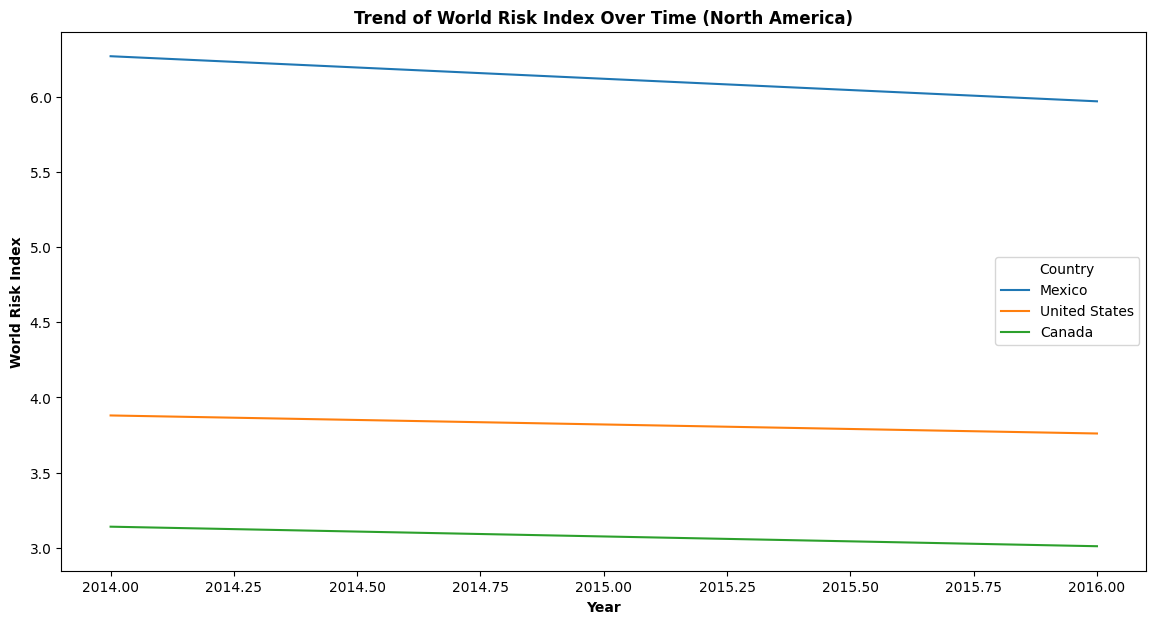

In [10]:
# List of North American countries for filtering
north_american_countries = ["Canada", "United States", "Mexico"]

# Filtering the data for North American countries
north_american_data = world_risk_index_cleaned[world_risk_index_cleaned["Region"].isin(north_american_countries)]

# Plotting the trend of World Risk Index over the years (North America)
plt.figure(figsize=(14, 7))
sns.lineplot(data=north_american_data, x="Year", y="WRI", hue="Region", ci=None)
plt.title("Trend of World Risk Index Over Time (North America)", fontweight='bold')
plt.ylabel("World Risk Index", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.legend(title="Country")
plt.show()

The line chart displays the trend of the World Risk Index (WRI) over time for North American countries (Canada, United States, and Mexico). Each country's trend is differentiated by color.

## Canada-Specific Analysis

Now, let's focus specifically on Canada and delve deeper into its data. We'll examine the trend of various metrics over time for Canada.

### Trend of Various Metrics Over Time

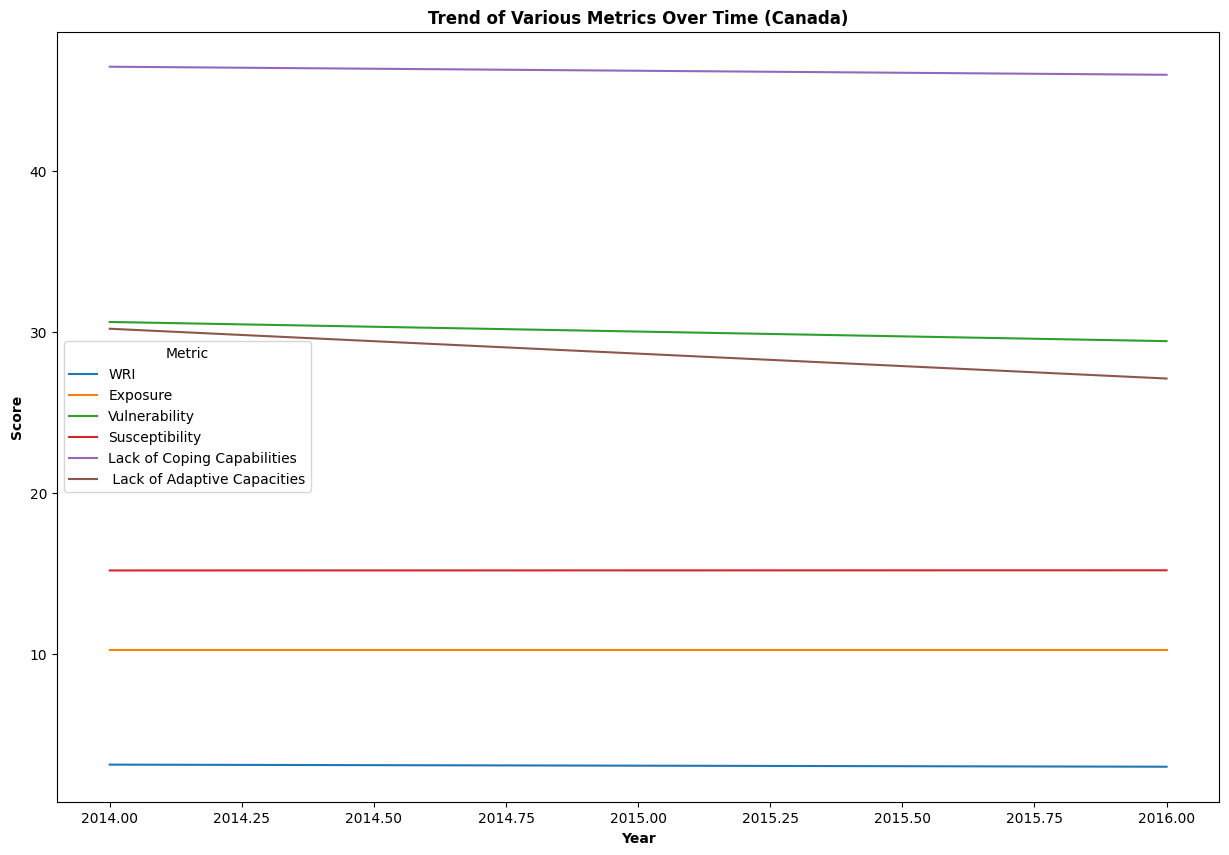

In [11]:
# Filtering data for Canada
canada_data = world_risk_index_cleaned[world_risk_index_cleaned["Region"] == "Canada"]

# Plotting the trend of various metrics over time (Canada)
metrics = ["WRI", "Exposure", "Vulnerability", "Susceptibility", "Lack of Coping Capabilities", " Lack of Adaptive Capacities"]

plt.figure(figsize=(15, 10))
for metric in metrics:
    sns.lineplot(data=canada_data, x="Year", y=metric, label=metric)

plt.title("Trend of Various Metrics Over Time (Canada)", fontweight='bold')
plt.ylabel("Score", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.legend(title="Metric")
plt.show()

The line chart presents the trend of various metrics over time specifically for Canada. These metrics include:

- **World Risk Index (WRI):** Represents the overall risk of natural disasters.
- **Exposure:** Indicates the exposure to natural disasters.
- **Vulnerability:** Represents the overall vulnerability to natural disasters.
- **Susceptibility:** Reflects the potential for harm in the event of a disaster.
- **Lack of Coping Capabilities:** Indicates the inability to cope with the effects of a disaster.
- **Lack of Adaptive Capacities:** Represents the inability to adapt to potential future disasters.

From the chart, we can derive insights into how Canada's risk profile and capabilities have evolved over time.


## Insights and Conclusion

From the analysis, several insights emerge:

1. **Global Perspective**: The World Risk Index displayed a decreasing trend up until 2016, indicative of global improvements in regions' capacities to manage, adapt to, and mitigate the impacts of natural disasters. However, post-2016, the index experienced an upswing, peaking in 2019. This upsurge could be attributed to either an increase in the frequency or severity of natural disasters or a potential decline in worldwide readiness and response effectiveness. Additionally, socio-political dynamics and economic hurdles could have influenced this rising trend.
2. **North America**: Canada, the United States, and Mexico each exhibit unique trends in their respective World Risk Index scores.
3. **Canada**: While there have been fluctuations in various metrics for Canada, the general trend in the World Risk Index indicates improvements over time.

These findings highlight the importance of understanding regional and country-specific risks to effectively prepare for, mitigate, and respond to natural disasters. Such insights can guide resource allocation and community engagement efforts to ensure the safety and well-being of populations at risk.
